In [1]:
seed = 3906303

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


import gzip
import random
np.random.seed(seed)
random.seed(seed)

In [3]:
df_icu_filtered = pd.read_csv("Datagen/bg_filtered_chartevents.csv")
df_icu_filtered

,subject_id,hadm_id,stay_id,caregiver_id,charttime,storetime,itemid,value,valuenum,valueuom,warning
0,10000032,29079034,39553978,NaN,2180-07-23 21:45:00,2180-07-23 22:30:00,220621,115.0,115.0,mg/dL,1
1,10000690,25860671,37081114,84407.0,2150-11-04 10:00:00,2150-11-04 09:39:00,225664,117.0,117.0,NaN,0
2,10000690,25860671,37081114,NaN,2150-11-03 02:56:00,2150-11-03 04:22:00,220621,77.0,77.0,mg/dL,0
3,10000690,25860671,37081114,NaN,2150-11-04 03:03:00,2150-11-04 03:44:00,220621,84.0,84.0,mg/dL,0
4,10000690,25860671,37081114,NaN,2150-11-04 17:54:00,2150-11-04 18:41:00,220621,120.0,120.0,mg/dL,1
...,...,...,...,...,...,...,...,...,...,...,...
1814457,19999987,23865745,36195440,68756.0,2145-11-04 02:00:00,2145-11-04 05:07:00,225664,112.0,112.0,NaN,0
1814458,19999987,23865745,36195440,69532.0,2145-11-03 08:00:00,2145-11-03 07:58:00,225664,122.0,122.0,NaN,0
1814459,19999987,23865745,36195440,96092.0,2145-11-04 08:00:00,2145-11-04 08:11:00,225664,127.0,127.0,NaN,0
1814460,19999987,23865745,36195440,NaN,2145-11-03 01:35:00,2145-11-03 02:42:00,220621,113.0,113.0,mg/dL,1


In [4]:
bg_icu = df_icu_filtered
bg_icu.sort_values(by=['subject_id', 'charttime'])

,subject_id,hadm_id,stay_id,caregiver_id,charttime,storetime,itemid,value,valuenum,valueuom,warning
0,10000032,29079034,39553978,NaN,2180-07-23 21:45:00,2180-07-23 22:30:00,220621,115.0,115.0,mg/dL,1
2,10000690,25860671,37081114,NaN,2150-11-03 02:56:00,2150-11-03 04:22:00,220621,77.0,77.0,mg/dL,0
3,10000690,25860671,37081114,NaN,2150-11-04 03:03:00,2150-11-04 03:44:00,220621,84.0,84.0,mg/dL,0
1,10000690,25860671,37081114,84407.0,2150-11-04 10:00:00,2150-11-04 09:39:00,225664,117.0,117.0,NaN,0
4,10000690,25860671,37081114,NaN,2150-11-04 17:54:00,2150-11-04 18:41:00,220621,120.0,120.0,mg/dL,1
...,...,...,...,...,...,...,...,...,...,...,...
1814458,19999987,23865745,36195440,69532.0,2145-11-03 08:00:00,2145-11-03 07:58:00,225664,122.0,122.0,NaN,0
1814456,19999987,23865745,36195440,68756.0,2145-11-03 20:00:00,2145-11-03 20:00:00,225664,105.0,105.0,NaN,0
1814457,19999987,23865745,36195440,68756.0,2145-11-04 02:00:00,2145-11-04 05:07:00,225664,112.0,112.0,NaN,0
1814461,19999987,23865745,36195440,NaN,2145-11-04 05:01:00,2145-11-04 05:51:00,220621,100.0,100.0,mg/dL,0


In [5]:
bg_icu.sort_values(by=['value'], ascending=False).head()

,subject_id,hadm_id,stay_id,caregiver_id,charttime,storetime,itemid,value,valuenum,valueuom,warning
813554,14478278,29643008,30892963,94048.0,2171-11-22 22:00:00,2171-11-23 08:40:00,225664,1653550.0,1653550.0,NaN,0
449808,12468016,25074766,37541173,NaN,2138-12-11 08:46:00,2138-12-11 08:53:00,226537,1276100.0,1276100.0,mg/dL,1
749049,14117743,27781009,36666568,NaN,2178-08-25 01:13:00,2178-08-27 13:26:00,220621,999999.0,999999.0,NaN,0
901817,14988347,21377296,37919600,NaN,2138-07-19 06:40:00,2138-07-20 15:36:00,220621,999999.0,999999.0,NaN,0
1125680,16178097,27286024,31149549,NaN,2188-01-16 11:31:00,2188-01-17 13:58:00,220621,999999.0,999999.0,NaN,0


In [6]:
bg_icu['charttime'] = pd.to_datetime(
    bg_icu['charttime'],
    format='%Y-%m-%d %H:%M:%S',   # matches 2180-07-23 21:45:00
    errors='raise'               # or 'coerce' to turn bad rows into NaT
)
bg_icu['storetime'] = pd.to_datetime(
    bg_icu['storetime'],
    format='%Y-%m-%d %H:%M:%S',   # matches 2180-07-23 21:45:00
    errors='raise'               # or 'coerce' to turn bad rows into NaT
)

In [7]:
bg_icu['valueuom'].value_counts()

mg/dL    766532
Name: valueuom, dtype: int64

In [8]:
print(bg_icu[bg_icu['value'] < 2656].shape)
print(bg_icu[bg_icu['value'] > 2656].shape)

(1814336, 11)
(126, 11)


In [9]:
bg_icu = bg_icu[(bg_icu['value'] < 2656) & (bg_icu['value'] > 10)]

In [10]:
bg_icu.sort_values(by=['value','stay_id','charttime'], ascending=False).head()

,subject_id,hadm_id,stay_id,caregiver_id,charttime,storetime,itemid,value,valuenum,valueuom,warning
815029,14486307,29356263,36290136,NaN,2188-01-11 02:59:00,2188-01-11 05:32:00,220621,2650.0,2650.0,mg/dL,1
815015,14486307,29356263,36290136,NaN,2187-12-29 14:09:00,2187-12-29 15:49:00,220621,2600.0,2600.0,mg/dL,1
1059308,15816613,20786142,37630991,NaN,2181-11-23 02:04:00,2181-11-23 03:25:00,220621,2474.0,2474.0,mg/dL,1
799544,14392310,22267572,30763023,NaN,2178-08-13 01:44:00,2178-08-13 02:51:00,220621,2440.0,2440.0,mg/dL,1
990820,15465739,28798031,38185691,NaN,2137-03-14 17:18:00,2137-03-14 20:33:00,220621,2323.0,2323.0,mg/dL,1


In [11]:
counts = bg_icu['stay_id'].value_counts()
valid_stays = counts[(counts >= 2)].index
bg_icu = bg_icu[bg_icu['stay_id'].isin(valid_stays)]
bg_icu['stay_id'].value_counts()

30359303    1274
33576993     961
33566920     835
39510663     787
32380519     783
            ... 
33381080       2
33779641       2
36202456       2
32428829       2
31107990       2
Name: stay_id, Length: 84895, dtype: int64

In [12]:
counts = bg_icu['stay_id'].value_counts()
valid_stays = counts[(counts >= 7)].index
copy = bg_icu[bg_icu['stay_id'].isin(valid_stays)].copy()

In [13]:
copy.sort_values(by=['stay_id','charttime'], ascending=True).head(20)

,subject_id,hadm_id,stay_id,caregiver_id,charttime,storetime,itemid,value,valuenum,valueuom,warning
449293,12466550,23998182,30000153,NaN,2174-09-29 13:27:00,2174-09-29 13:30:00,226537,158.0,158.0,mg/dL,1
449294,12466550,23998182,30000153,NaN,2174-09-29 14:07:00,2174-09-29 14:09:00,226537,176.0,176.0,mg/dL,1
449295,12466550,23998182,30000153,NaN,2174-09-29 15:37:00,2174-09-29 16:45:00,220621,192.0,192.0,mg/dL,1
449296,12466550,23998182,30000153,NaN,2174-09-29 16:05:00,2174-09-29 16:06:00,226537,175.0,175.0,mg/dL,1
449288,12466550,23998182,30000153,4477.0,2174-09-29 20:00:00,2174-09-29 21:11:00,226537,185.0,185.0,NaN,0
449289,12466550,23998182,30000153,4477.0,2174-09-30 00:35:00,2174-09-30 00:56:00,226537,145.0,145.0,NaN,0
449297,12466550,23998182,30000153,NaN,2174-09-30 03:34:00,2174-09-30 04:46:00,220621,144.0,144.0,mg/dL,1
449290,12466550,23998182,30000153,46354.0,2174-09-30 13:00:00,2174-09-30 13:55:00,225664,139.0,139.0,NaN,0
449291,12466550,23998182,30000153,78421.0,2174-09-30 20:00:00,2174-09-30 20:56:00,225664,137.0,137.0,NaN,0
449292,12466550,23998182,30000153,78421.0,2174-10-01 02:00:00,2174-10-01 02:22:00,225664,136.0,136.0,NaN,0


The below code calculates the average time between BG measurements across all ICU stays.

In [ ]:
icu_stays = bg_icu['stay_id'].unique()
all_gaps = []
for stay_id in icu_stays:
    # Gets the specific ICU stay data
    df_stay = bg_icu.loc[bg_icu['stay_id'] == stay_id].sort_values(by=['charttime']).reset_index(drop=True)

    df_stay['gap'] = df_stay['charttime'].diff()

    # Convert that to hours
    df_stay['gap_hours'] = df_stay['gap'].dt.total_seconds() / 3600

    # drop the first NaN (diff for the very first row) and any other NaNs
    stay_gaps = df_stay['gap_hours'].dropna().tolist()
    all_gaps.extend(stay_gaps)

# 3) Now all_gaps is a flat list of every gap within each ICU stay
all_gaps = np.array(all_gaps, dtype=np.float32)

# 4) Compute statistics
median_gap = np.median(all_gaps)
mean_gap   = all_gaps.mean()
# Averaged mean
print(mean_gap)
print(median_gap)

4.363479
3.4


In [ ]:
plt.hist(all_gaps, bins=5)
plt.xlabel("Gap between readings (hours)")
plt.ylabel("Count")
plt.title("Distribution of in-stay measurement gaps")
plt.show()

NameError: name 'all_gaps' is not defined

In [ ]:
# suppose all_gaps is your 1D numpy array of gaps
qs = [0.01, 0.25, 0.5 , 0.75, 0.99]
quantile_values = np.quantile(all_gaps, qs)

for q, val in zip(qs, quantile_values):
    print(f"{q:.2%} quantile → {val:.2f} hours")

NameError: name 'all_gaps' is not defined

In [15]:
bg_icu['subject_id'].nunique()

60089

# Split Dataset into Training, Validation and Testing Datasets

In [16]:
# Get unique patient ids
unique_subjects = bg_icu['subject_id'].unique()

train_subjects, test_subjects = train_test_split(unique_subjects, test_size=0.2, random_state=seed)
train_subjects, test_subjects

(array([16710356, 13201095, 15796318, ..., 10931606, 14759494, 12790067],
       dtype=int64),
 array([13268396, 14744186, 16635499, ..., 16774869, 10123699, 17858582],
       dtype=int64))

In [17]:
train_subjects, val_subjects = train_test_split(train_subjects, test_size=0.25, random_state=seed)

In [18]:
bg_icu['subject_id'].isin(test_subjects).sum()

365401

In [19]:
bg_icu['subject_id'].isin(train_subjects).sum()

1076450

In [20]:
bg_icu['valueuom'].isna().sum()

1047207

### Creating sequenced data

Here we create the data to be fed into the model. Each row of data in the X datasets is a sequence of BG measurements. The Y datasets contain a BG reading that follows directly from that sequence after.

The approach we took is so that a sequence of measurements (starting from the first) is created of certain length from each ICU admission, which is taken as the X, and the following value after the sequence is taken as the Y. Then the window is slid over by one so that the sequence is slightly different, creating a new X value and a new following Y value. This process is repeated until the end of the ICU admission measurement sequence is reached, then a new ICU admission is chosen, until all ICU admissions have had their sequences recorded.

In [21]:
df_train = bg_icu[bg_icu['subject_id'].isin(train_subjects)]
df_train.head()

,subject_id,hadm_id,stay_id,caregiver_id,charttime,storetime,itemid,value,valuenum,valueuom,warning
7,10000980,26913865,39765666,64209.0,2189-06-27 10:00:00,2189-06-27 10:10:00,225664,110.0,110.0,NaN,0
8,10000980,26913865,39765666,64209.0,2189-06-27 16:00:00,2189-06-27 16:24:00,225664,109.0,109.0,NaN,0
12,10001725,25563031,31205490,67214.0,2110-04-11 17:30:00,2110-04-11 17:32:00,225664,161.0,161.0,NaN,0
13,10001725,25563031,31205490,NaN,2110-04-11 18:02:00,2110-04-11 18:53:00,220621,146.0,146.0,mg/dL,1
14,10001725,25563031,31205490,NaN,2110-04-12 02:59:00,2110-04-12 03:47:00,220621,152.0,152.0,mg/dL,1


In [22]:
df_val = bg_icu[bg_icu['subject_id'].isin(val_subjects)]
df_val.head()

,subject_id,hadm_id,stay_id,caregiver_id,charttime,storetime,itemid,value,valuenum,valueuom,warning
1,10000690,25860671,37081114,84407.0,2150-11-04 10:00:00,2150-11-04 09:39:00,225664,117.0,117.0,NaN,0
2,10000690,25860671,37081114,NaN,2150-11-03 02:56:00,2150-11-03 04:22:00,220621,77.0,77.0,mg/dL,0
3,10000690,25860671,37081114,NaN,2150-11-04 03:03:00,2150-11-04 03:44:00,220621,84.0,84.0,mg/dL,0
4,10000690,25860671,37081114,NaN,2150-11-04 17:54:00,2150-11-04 18:41:00,220621,120.0,120.0,mg/dL,1
5,10000690,25860671,37081114,NaN,2150-11-05 05:36:00,2150-11-05 06:28:00,220621,107.0,107.0,mg/dL,1


In [23]:
df_test = bg_icu[bg_icu['subject_id'].isin(test_subjects)]
df_test.head()

,subject_id,hadm_id,stay_id,caregiver_id,charttime,storetime,itemid,value,valuenum,valueuom,warning
33,10002013,23581541,39060235,5808.0,2160-05-19 01:00:00,2160-05-19 01:09:00,225664,119.0,119.0,NaN,0
34,10002013,23581541,39060235,5808.0,2160-05-19 02:15:00,2160-05-19 02:17:00,225664,107.0,107.0,NaN,0
35,10002013,23581541,39060235,8947.0,2160-05-19 16:00:00,2160-05-19 16:04:00,225664,236.0,236.0,NaN,0
36,10002013,23581541,39060235,28759.0,2160-05-18 17:00:00,2160-05-18 17:06:00,225664,154.0,154.0,NaN,0
37,10002013,23581541,39060235,28759.0,2160-05-18 19:00:00,2160-05-18 18:51:00,225664,179.0,179.0,NaN,0


In [24]:
df_train.sort_values(by=['subject_id','hadm_id','charttime'])

,subject_id,hadm_id,stay_id,caregiver_id,charttime,storetime,itemid,value,valuenum,valueuom,warning
7,10000980,26913865,39765666,64209.0,2189-06-27 10:00:00,2189-06-27 10:10:00,225664,110.0,110.0,NaN,0
8,10000980,26913865,39765666,64209.0,2189-06-27 16:00:00,2189-06-27 16:24:00,225664,109.0,109.0,NaN,0
12,10001725,25563031,31205490,67214.0,2110-04-11 17:30:00,2110-04-11 17:32:00,225664,161.0,161.0,NaN,0
13,10001725,25563031,31205490,NaN,2110-04-11 18:02:00,2110-04-11 18:53:00,220621,146.0,146.0,mg/dL,1
14,10001725,25563031,31205490,NaN,2110-04-12 02:59:00,2110-04-12 03:47:00,220621,152.0,152.0,mg/dL,1
...,...,...,...,...,...,...,...,...,...,...,...
1814458,19999987,23865745,36195440,69532.0,2145-11-03 08:00:00,2145-11-03 07:58:00,225664,122.0,122.0,NaN,0
1814456,19999987,23865745,36195440,68756.0,2145-11-03 20:00:00,2145-11-03 20:00:00,225664,105.0,105.0,NaN,0
1814457,19999987,23865745,36195440,68756.0,2145-11-04 02:00:00,2145-11-04 05:07:00,225664,112.0,112.0,NaN,0
1814461,19999987,23865745,36195440,NaN,2145-11-04 05:01:00,2145-11-04 05:51:00,220621,100.0,100.0,mg/dL,0


In [25]:
df_train['stay_id'].value_counts().describe()

count    50862.000000
mean        21.164130
std         37.216863
min          2.000000
25%          4.000000
50%         10.000000
75%         23.000000
max       1274.000000
Name: stay_id, dtype: float64

C:\Users\Mashal\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


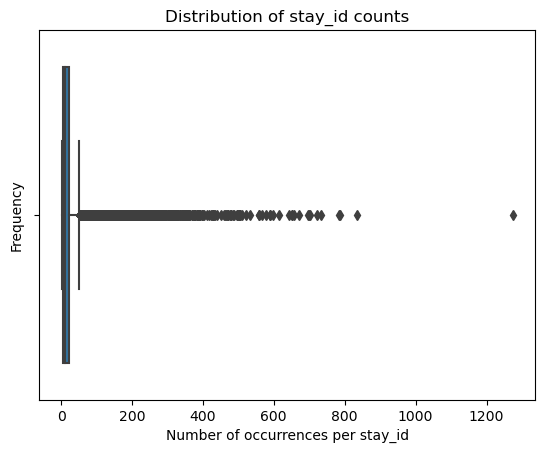

In [26]:
# Get counts
stay_counts = df_train['stay_id'].value_counts()

# Plot histogram of those counts
sns.boxplot(stay_counts)  # Optional: adjust bins

plt.xlabel('Number of occurrences per stay_id')
plt.ylabel('Frequency')
plt.title('Distribution of stay_id counts')
plt.show()


C:\Users\Mashal\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


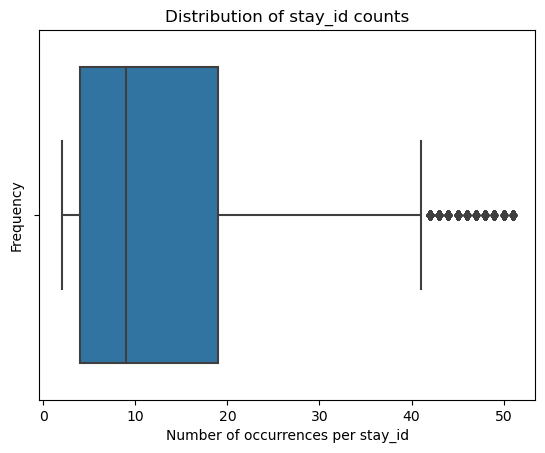

In [27]:
counts = df_train['stay_id'].value_counts()

Q1 = counts.quantile(0.25)
Q3 = counts.quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

valid_stays = counts[(counts >= lower_bound) & (counts <= upper_bound)].index

df_filtered = df_train[df_train['stay_id'].isin(valid_stays)]
# Plot boxplot of those counts
sns.boxplot(df_filtered['stay_id'].value_counts())

plt.xlabel('Number of occurrences per stay_id')
plt.ylabel('Frequency')
plt.title('Distribution of stay_id counts')
plt.show()

In [28]:
train_icu_stays = df_train['stay_id'].unique()

In [29]:
df_train['stay_id'].value_counts()

30359303    1274
33566920     835
39510663     787
32380519     783
31010136     734
            ... 
35206016       2
37216596       2
38214855       2
32406434       2
39765666       2
Name: stay_id, Length: 50862, dtype: int64

In [30]:
df_train.reset_index(drop=True)[df_train.reset_index(drop=True)['stay_id']==33566920]

,subject_id,hadm_id,stay_id,caregiver_id,charttime,storetime,itemid,value,valuenum,valueuom,warning
1061984,19874859,23391430,33566920,701.0,2169-04-12 09:00:00,2169-04-12 09:45:00,225664,133.0,133.0,NaN,0
1061985,19874859,23391430,33566920,701.0,2169-04-12 10:00:00,2169-04-12 10:09:00,225664,132.0,132.0,NaN,0
1061986,19874859,23391430,33566920,701.0,2169-04-12 13:00:00,2169-04-12 13:36:00,225664,118.0,118.0,NaN,0
1061987,19874859,23391430,33566920,701.0,2169-04-12 15:00:00,2169-04-12 15:09:00,225664,138.0,138.0,NaN,0
1061988,19874859,23391430,33566920,701.0,2169-04-12 17:00:00,2169-04-12 17:01:00,225664,132.0,132.0,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...
1062814,19874859,23391430,33566920,NaN,2169-05-19 04:14:00,2169-05-19 05:11:00,220621,109.0,109.0,mg/dL,1
1062815,19874859,23391430,33566920,NaN,2169-05-20 03:55:00,2169-05-20 05:02:00,220621,150.0,150.0,mg/dL,1
1062816,19874859,23391430,33566920,NaN,2169-05-21 02:09:00,2169-05-21 03:18:00,220621,151.0,151.0,mg/dL,1
1062817,19874859,23391430,33566920,NaN,2169-05-22 01:27:00,2169-05-22 02:20:00,220621,98.0,98.0,mg/dL,0


### Hyperparameters

In [31]:
FREQ       = '2H'           # 2-hour bins
MAX_HOURS  = 48
STEPS      = MAX_HOURS // 2 # 48 h ÷ 2 h = 24 bins
L          = 6               # look-back  steps (12 hours of history)
H          = 1               # look-ahead steps (direct subsequent prediction)
SENTINEL   = -1.0            # value the Masking layer will ignore

### Here we resample the data to ensure there is a row for every timestep interval of 2 hours.

In [32]:
def resample_one(stay_df):
    # Return length=STEPS array of 2 hour means (with possibly NaN data).

    # Converts ICU_stay data to a format where the data is either combined into a
    # mean for every timestep of 2 hours, or a gap is left as a NaN value
    s = (stay_df
         .set_index('charttime')['value']
         .resample(FREQ).mean())

    # Sets the length of the data to be STEPS length long, cutting off any
    # data that goes beyond that many steps
    idx = pd.date_range(start=s.index.min(), periods=STEPS, freq=FREQ)
    return s.reindex(idx).values

In [33]:
def make_Xy(df_subset, scaler=None, fit_scaler=False):

    X_stays = []
    # Iterate through data, converting all icu_stay data into their own dataframes
    # then passing it to the resampling method
    for _, g in (df_subset
                 .sort_values(['stay_id', 'charttime'])
                 .groupby('stay_id')):
        X_stays.append(resample_one(g))

    # Converts all icu_stay glucose value series sequences to numpy 2-d array, of shape (N_STAYS, steps)
    X_stays = np.stack(X_stays)

    # Normalise using z-scores

    # Ensures scaler is created for training object, so it creates the mean and std of training data,
    # then fits test and val data to it
    if scaler is None:
        scaler = StandardScaler()
    # Converts all data to flat shape so mean and std can be computed in a single vector
    flat = X_stays.reshape(-1, 1)
    mask = ~np.isnan(flat)

    # Tensorflow fit() method expects a 2D array of shape
    real_vals = flat[mask].reshape(-1, 1)


    if fit_scaler:
        # Learn the variables of only the real values (non-NaN)
        scaler.fit(real_vals)
    # Apply the learned transformation to the actual values
    flat[mask] = scaler.transform(real_vals).ravel()
    X_stays = flat.reshape(X_stays.shape)    # back to (N_stays, STEPS)

    # Sliding window
    windows, targets = [], []
    for stay in X_stays:
        # Window slides across every point so that the entire horizon of the ICU stay is included once
        for t0 in range(0, STEPS - L - H + 1):
            x_win = stay[t0 : t0 + L]         # Look-back window
            y_val = stay[t0 + L + H - 1]      # Value following window
            if not np.isnan(y_val):           # ensure that the final y value is an actual value
                windows.append(x_win)
                targets.append(y_val)

    # [..., None] shorthand adds an extra 3rd dimension so it can be fitted to the tensorflow LSTM
    X = np.array(windows)[..., None]
    y = np.array(targets,  dtype='float32')

    # replace NaN inside X with sentinel so Masking works
    X[np.isnan(X)] = SENTINEL
    return X.astype('float32'), y, scaler

In [34]:
X_train, y_train, scaler = make_Xy(df_train,
                                   scaler=None,
                                   fit_scaler=True)
X_val, y_val, _ = make_Xy(df_val,
                          scaler=scaler,
                          fit_scaler=False)
X_test, y_test, _ = make_Xy(df_test,
                            scaler=scaler,
                            fit_scaler=False)

In [35]:
print("Train:", X_train.shape, y_train.shape)
print("Val  :", X_val.shape,   y_val.shape)
print("Test :", X_test.shape,  y_test.shape)

Train: (245319, 6, 1) (245319,)
Val  : (81839, 6, 1) (81839,)
Test : (83310, 6, 1) (83310,)


In [36]:
BATCH = 64
def make_ds(X, y, shuffle=True):
    ds = tf.data.Dataset.from_tensor_slices((X, y))
    if shuffle:
        ds = ds.shuffle(len(y), seed=seed)
    return ds.batch(BATCH).prefetch(tf.data.AUTOTUNE)

In [37]:
ds_train = make_ds(X_train, y_train, shuffle=True)
ds_val   = make_ds(X_val,   y_val,   shuffle=False)
ds_test  = make_ds(X_test,  y_test,  shuffle=False)

In [39]:
model = tf.keras.Sequential([
    tf.keras.layers.Masking(mask_value=SENTINEL, input_shape=(L, 1)),
    tf.keras.layers.LSTM(64),
    # A dense layer here is necessary, as each hidden state output, which is
    # the output of an LSTM unit is only within the range of a tanh activation function,
    # so further transformation is needed
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(1)                   # regression
])

model.compile(loss='mse', optimizer='adam', metrics=['mae'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 masking_1 (Masking)         (None, 6, 1)              0         
                                                                 
 lstm (LSTM)                 (None, 64)                16896     
                                                                 
 dense (Dense)               (None, 32)                2080      
                                                                 
 dense_1 (Dense)             (None, 1)                 33        
                                                                 
Total params: 19,009
Trainable params: 19,009
Non-trainable params: 0
_________________________________________________________________


In [40]:

os.makedirs('models', exist_ok=True)

In [41]:
#  Create a checkpoint callback
checkpoint_cb = tf.keras.callbacks.ModelCheckpoint(
    filepath='models/model_epoch_{epoch:02d}.h5',
    save_freq='epoch',                       # save after each epoch
    save_weights_only=False,                 # save the entire model (architecture + weights + optimizer state)
    verbose=1
)

history = model.fit(
    ds_train,
    epochs=100,
    validation_data=ds_val,
    callbacks=[checkpoint_cb],
    verbose=1
)

test_loss, test_mae = model.evaluate(ds_test)
print(f"Test RMSE = {np.sqrt(test_loss):.2f}   |   MAE = {test_mae:.2f}")


Epoch 1/100
3828/3834 [============================>.] - ETA: 0s - loss: 0.4177 - mae: 0.4189
Epoch 1: saving model to models\model_epoch_01.h5
3834/3834 [==============================] - 22s 5ms/step - loss: 0.4176 - mae: 0.4189 - val_loss: 0.4269 - val_mae: 0.4163
Epoch 2/100
3832/3834 [============================>.] - ETA: 0s - loss: 0.4091 - mae: 0.4136
Epoch 2: saving model to models\model_epoch_02.h5
3834/3834 [==============================] - 19s 5ms/step - loss: 0.4094 - mae: 0.4136 - val_loss: 0.4254 - val_mae: 0.4135
Epoch 3/100
3830/3834 [============================>.] - ETA: 0s - loss: 0.4082 - mae: 0.4129
Epoch 3: saving model to models\model_epoch_03.h5
3834/3834 [==============================] - 20s 5ms/step - loss: 0.4082 - mae: 0.4129 - val_loss: 0.4238 - val_mae: 0.4086
Epoch 4/100
3833/3834 [============================>.] - ETA: 0s - loss: 0.4075 - mae: 0.4125
Epoch 4: saving model to models\model_epoch_04.h5
3834/3834 [==============================] - 20s 5ms

3834/3834 [==============================] - 28s 7ms/step - loss: 0.4026 - mae: 0.4098 - val_loss: 0.4249 - val_mae: 0.4073
Epoch 32/100
3832/3834 [============================>.] - ETA: 0s - loss: 0.4023 - mae: 0.4097
Epoch 32: saving model to models\model_epoch_32.h5
3834/3834 [==============================] - 30s 8ms/step - loss: 0.4023 - mae: 0.4097 - val_loss: 0.4266 - val_mae: 0.4102
Epoch 33/100
3831/3834 [============================>.] - ETA: 0s - loss: 0.4022 - mae: 0.4096
Epoch 33: saving model to models\model_epoch_33.h5
3834/3834 [==============================] - 28s 7ms/step - loss: 0.4022 - mae: 0.4096 - val_loss: 0.4245 - val_mae: 0.4091
Epoch 34/100
3828/3834 [============================>.] - ETA: 0s - loss: 0.4021 - mae: 0.4096
Epoch 34: saving model to models\model_epoch_34.h5
3834/3834 [==============================] - 27s 7ms/step - loss: 0.4022 - mae: 0.4096 - val_loss: 0.4244 - val_mae: 0.4065
Epoch 35/100
3828/3834 [============================>.] - ETA: 0s 

Epoch 62/100
3832/3834 [============================>.] - ETA: 0s - loss: 0.3969 - mae: 0.4075
Epoch 62: saving model to models\model_epoch_62.h5
3834/3834 [==============================] - 35s 9ms/step - loss: 0.3968 - mae: 0.4074 - val_loss: 0.4281 - val_mae: 0.4090
Epoch 63/100
3830/3834 [============================>.] - ETA: 0s - loss: 0.3964 - mae: 0.4072
Epoch 63: saving model to models\model_epoch_63.h5
3834/3834 [==============================] - 36s 9ms/step - loss: 0.3965 - mae: 0.4073 - val_loss: 0.4286 - val_mae: 0.4098
Epoch 64/100
3828/3834 [============================>.] - ETA: 0s - loss: 0.3963 - mae: 0.4071
Epoch 64: saving model to models\model_epoch_64.h5
3834/3834 [==============================] - 35s 9ms/step - loss: 0.3963 - mae: 0.4071 - val_loss: 0.4293 - val_mae: 0.4105
Epoch 65/100
3830/3834 [============================>.] - ETA: 0s - loss: 0.3960 - mae: 0.4071
Epoch 65: saving model to models\model_epoch_65.h5
3834/3834 [==============================] -

In [42]:
std = scaler.scale_[0]      # std that StandardScaler learned
rmse_mgdl = np.sqrt(test_loss) * std
mae_mgdl  = test_mae * std

print(f"True RMSE  = {rmse_mgdl:.1f} mg/dL")
print(f"True  MAE  = {mae_mgdl:.1f} mg/dL")

True RMSE  = 40.2 mg/dL
True  MAE  = 26.3 mg/dL


In [43]:
y_pred_scaled = model.predict(ds_test).ravel()
y_true_scaled = y_test

# Inverse-transform
y_pred = scaler.inverse_transform(y_pred_scaled.reshape(-1, 1)).ravel()
y_true = scaler.inverse_transform(y_true_scaled.reshape(-1, 1)).ravel()

from sklearn.metrics import r2_score
r2 = r2_score(y_true, y_pred)
print(f"R^2 = {r2:.4f}")

1302/1302 [==============================] - 5s 2ms/step
R^2 = 0.5235
